In [16]:
pip install pandas numpy matplotlib scikit-learn seaborn geopandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import pandas as pd
import os

# directorio definido  
directory = './'  

# creando lista de archivos
dfs = {}

# traer todos los archivos
for filename in os.listdir(directory):
    if filename.endswith('.xlsx'):
        # extracciones de datos
        file_key = os.path.splitext(filename)[0]
        # leyendo archivos con pandas
        file_path = os.path.join(directory, filename)
        dfs[file_key] = pd.read_excel(file_path)

# imprimir los nombres de los archivos
print(f"DataFrames loaded: {list(dfs.keys())}")

DataFrames loaded: ['acc x rangos velocidad y provincia', 'acc x tecnologia', 'acc_tec_localidad', 'acc_vel_loc_sinrangos', 'ingresos', 'penetracion hogares', 'penetracion poblacion', 'penetraciones totales', 'Total acc x tecnologias', 'Vel%xprov', 'vel_sinrangos']


C:\Users\segen\AppData\Local\Temp\ipykernel_28448\915356166.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette="viridis")


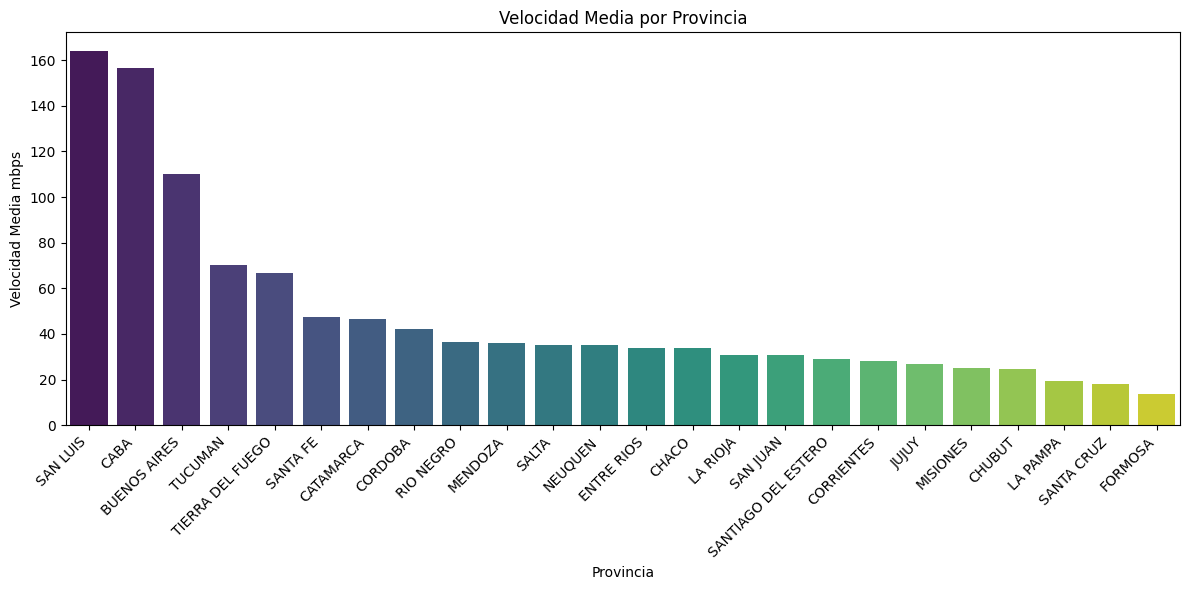

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

df = dfs['acc_vel_loc_sinrangos']

grouped = df.groupby('Provincia')['Velocidades'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=grouped.index, y=grouped.values, palette="viridis")
plt.title('Velocidad Media por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Velocidad Media mbps')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

C:\Users\segen\AppData\Local\Temp\ipykernel_28448\437869624.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_localidades.index, y=grouped_localidades.values, palette="viridis")


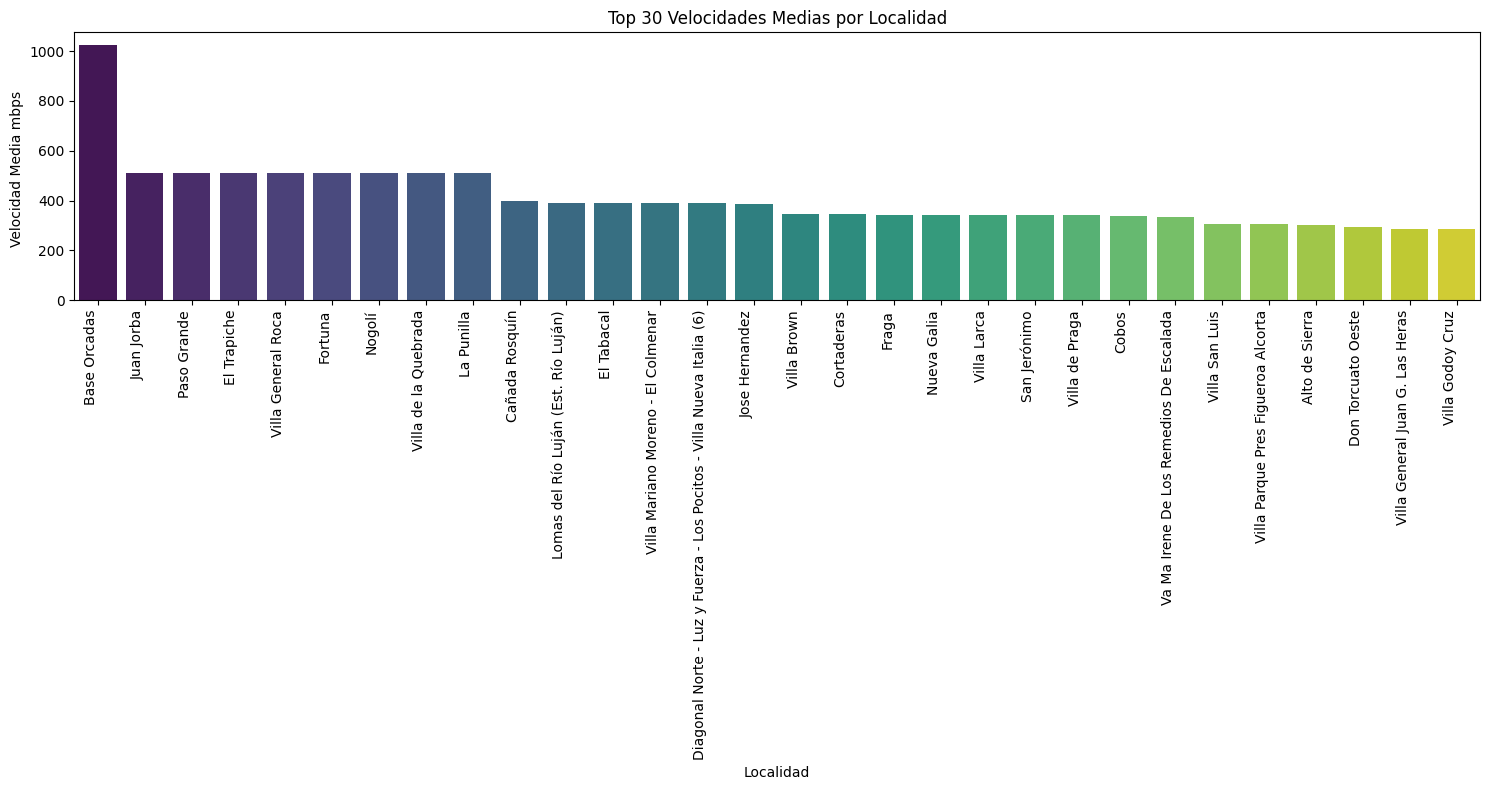

In [19]:
# Agrupar por localidad y calcular la media de las velocidades, luego seleccionar el top 30
grouped_localidades = df.groupby('localidad')['Velocidades'].mean().sort_values(ascending=False).head(30)

plt.figure(figsize=(15, 8))
sns.barplot(x=grouped_localidades.index, y=grouped_localidades.values, palette="viridis")
plt.title('Top 30 Velocidades Medias por Localidad')
plt.xlabel('Localidad')
plt.ylabel('Velocidad Media mbps ')
plt.xticks(rotation=90, ha='right')  
plt.tight_layout()  
plt.show()

Crecimiento porcentual anual de las tecnologías:
           ADSL  Cablemodem  Fibra óptica    Wireless      Otros
Año                                                             
2014        NaN         NaN           NaN         NaN        NaN
2015   1.551548   11.908508      2.647711    8.582596 -15.296128
2016  -0.277063    9.084651      9.542953    1.799771  -6.264464
2017  -2.882562   16.185930     12.671898   28.289606  51.191611
2018  -4.490091   17.127497     40.820449  101.007060  35.331617
2019 -18.125883   13.177637    195.740712   45.145147  95.238105
2020 -20.744895    9.517422     45.284418   23.833910   5.352997
2021 -14.006482   11.378043     39.616919   23.226882   5.091240
2022 -26.785558    5.442394     67.991410   15.832485  -6.577122
2023 -30.933876   -0.335676     31.718501    4.190157 -13.660367
2024 -23.554608   -1.381688     14.282150    2.497865  10.800171


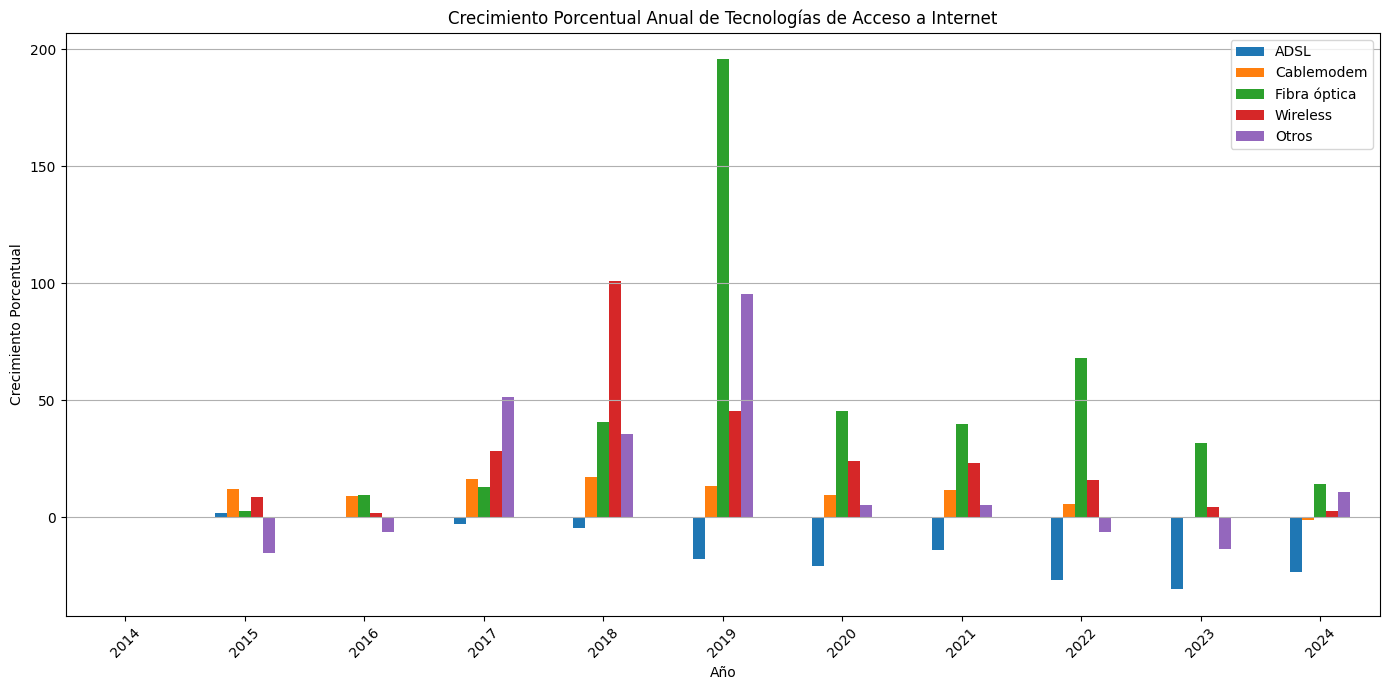

In [20]:
# Seleccion el DataFrame específico
df_tecnologias = dfs['Total acc x tecnologias']

# Agrupar por año y calcular la media de las columnas de tecnología
grouped_tecnologias = df_tecnologias.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].mean()

# Calcular el crecimiento porcentual año a año
crecimiento_tecnologias = grouped_tecnologias.pct_change() * 100

# Imprimir el resultado
print("Crecimiento porcentual anual de las tecnologías:")
print(crecimiento_tecnologias)

# Crear un gráfico de barras para el crecimiento de cada tecnología
crecimiento_tecnologias.plot(kind='bar', figsize=(14, 7))
plt.title('Crecimiento Porcentual Anual de Tecnologías de Acceso a Internet')
plt.xlabel('Año')
plt.ylabel('Crecimiento Porcentual')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\segen\AppData\Local\Temp\ipykernel_28448\31422113.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accesos_por_partido.index, y=accesos_por_partido.values, palette="viridis")


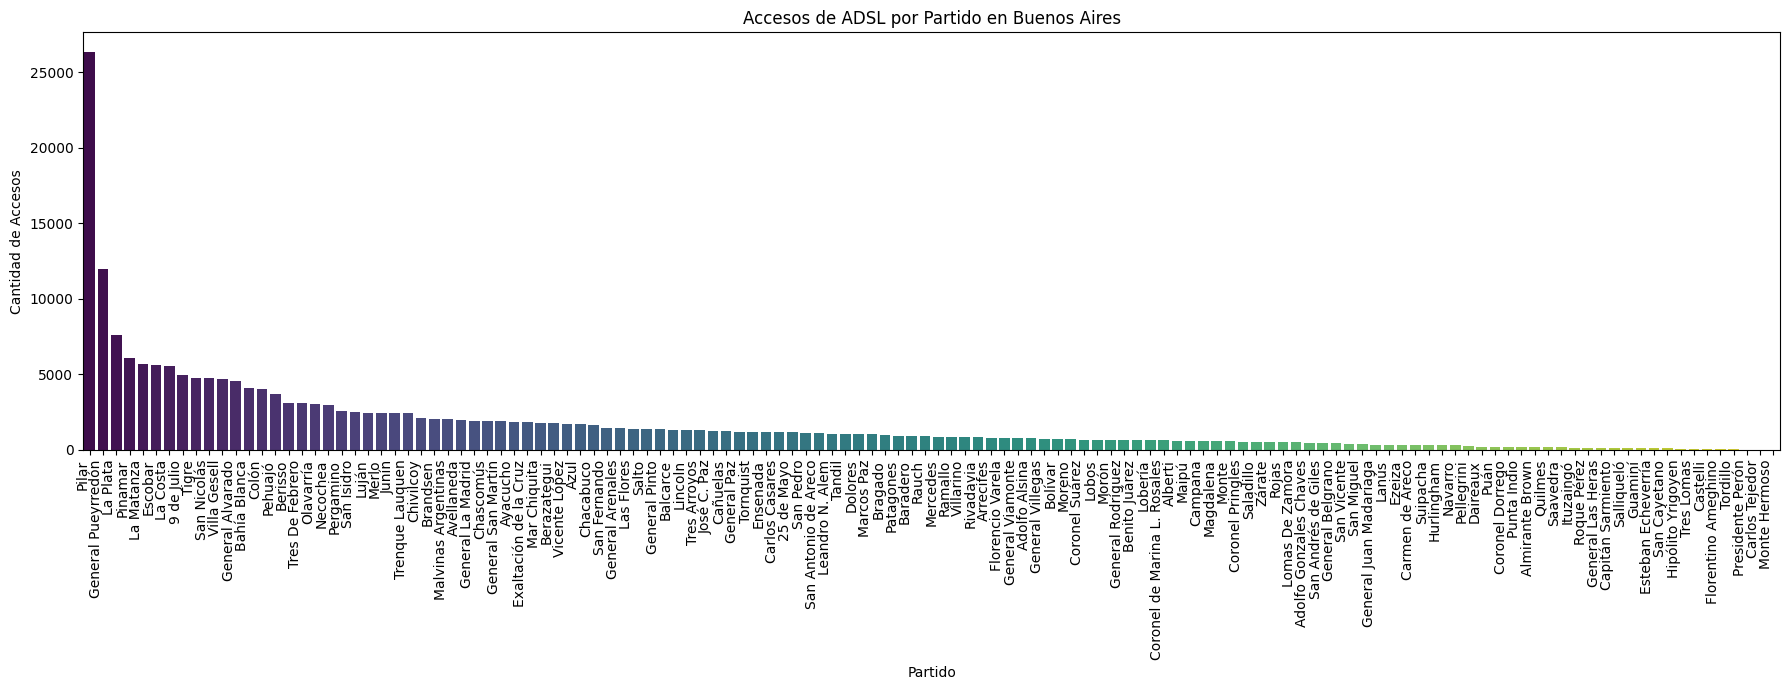

In [21]:
# Filtrar el DataFrame para la provincia de Buenos Aires y tecnología ADSL
df_filtered = dfs['acc_tec_localidad'][(dfs['acc_tec_localidad']['Provincia'] == 'BUENOS AIRES') & (dfs['acc_tec_localidad']['Tecnologia'] == 'ADSL')]

accesos_por_partido = df_filtered.groupby('Partido')['Accesos'].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 7))
sns.barplot(x=accesos_por_partido.index, y=accesos_por_partido.values, palette="viridis")
plt.title('Accesos de ADSL por Partido en Buenos Aires')
plt.xlabel('Partido')
plt.ylabel('Cantidad de Accesos')
plt.xticks(rotation=90, ha='right') 
plt.tight_layout()  
plt.show()

C:\Users\segen\AppData\Local\Temp\ipykernel_28448\3998820610.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accesos_por_partido_cablemodem.index, y=accesos_por_partido_cablemodem.values, palette="viridis")


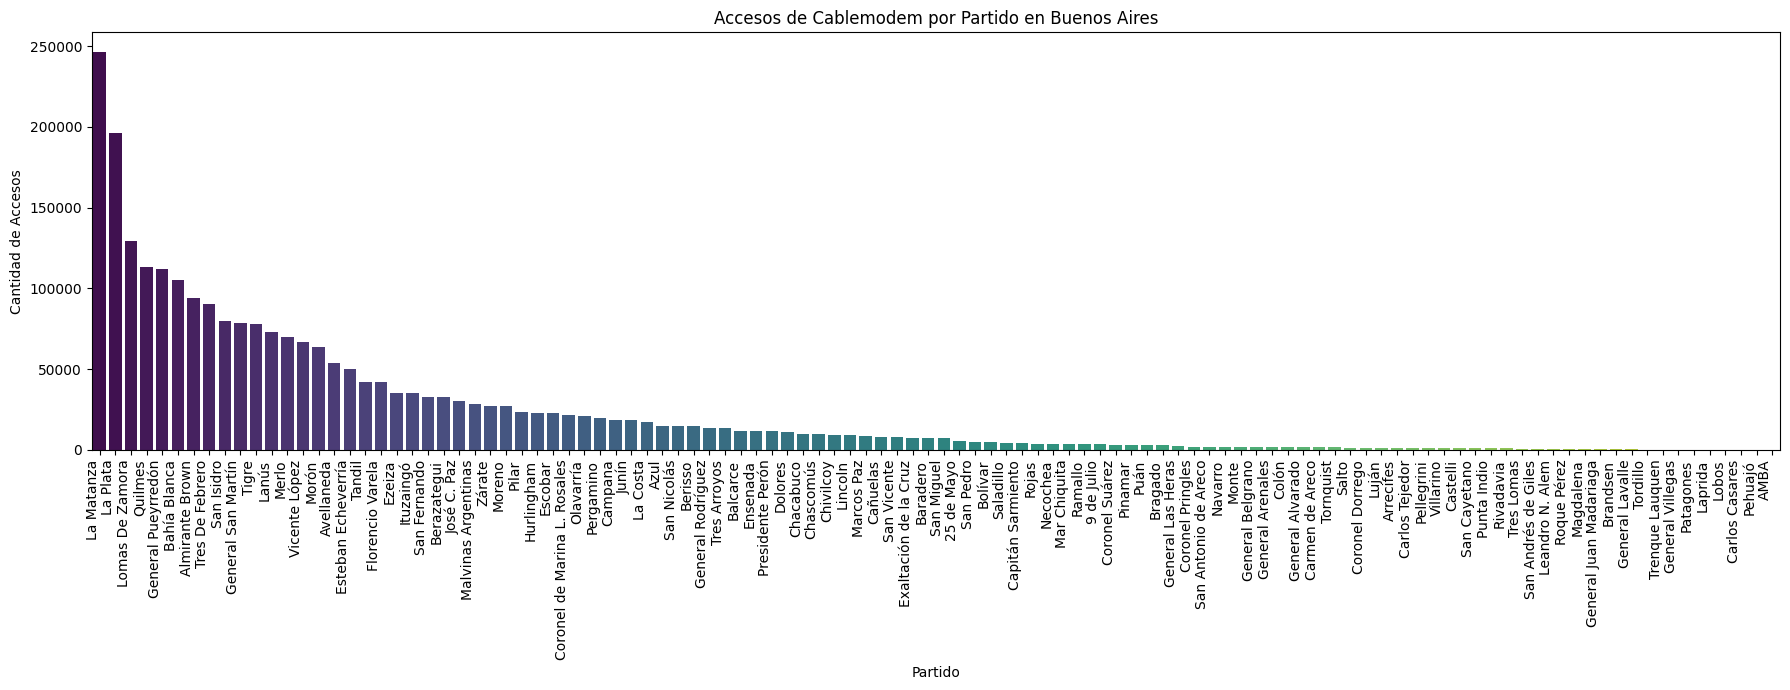

In [22]:
# Filtrar el DataFrame para la provincia de Buenos Aires y tecnología Cablemodem
df_cablemodem_bsas = dfs['acc_tec_localidad'][(dfs['acc_tec_localidad']['Provincia'] == 'BUENOS AIRES') & (dfs['acc_tec_localidad']['Tecnologia'] == 'CABLEMODEM')]

# Agrupar por partido y sumar los accesos
accesos_por_partido_cablemodem = df_cablemodem_bsas.groupby('Partido')['Accesos'].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 7))
sns.barplot(x=accesos_por_partido_cablemodem.index, y=accesos_por_partido_cablemodem.values, palette="viridis")
plt.title('Accesos de Cablemodem por Partido en Buenos Aires')
plt.xlabel('Partido')
plt.ylabel('Cantidad de Accesos')
plt.xticks(rotation=90, ha='right')  
plt.tight_layout()  
plt.show()

C:\Users\segen\AppData\Local\Temp\ipykernel_28448\3106729327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accesos_por_partido_fibra.index, y=accesos_por_partido_fibra.values, palette="viridis")


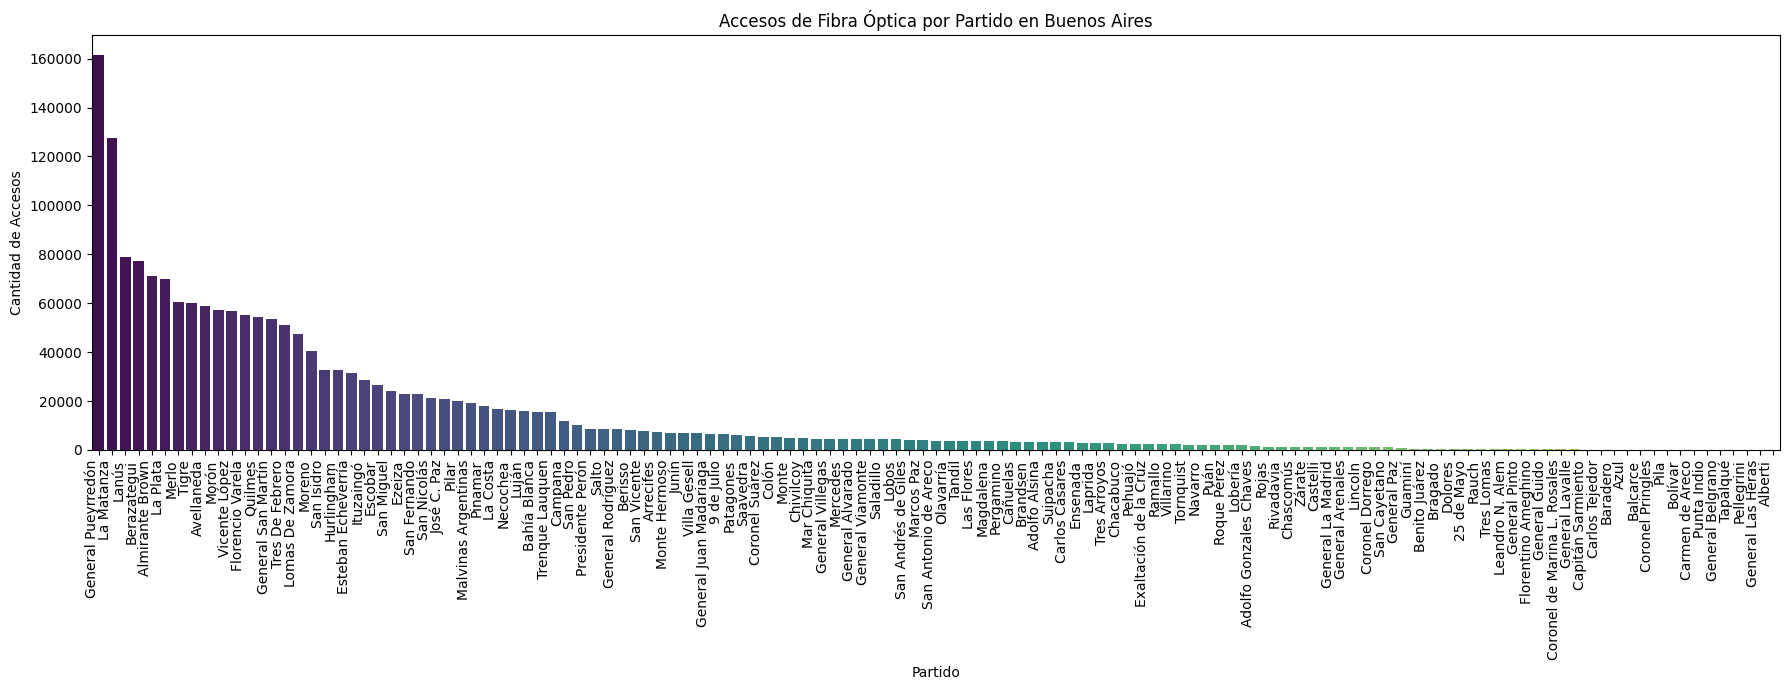

In [23]:
# Filtrar el DataFrame para la provincia de Buenos Aires y tecnología Fibra óptica
df_fibra_bsas = dfs['acc_tec_localidad'][(dfs['acc_tec_localidad']['Provincia'] == 'BUENOS AIRES') & (dfs['acc_tec_localidad']['Tecnologia'] == 'FIBRA OPTICA')]

# Agrupar por partido y sumar los accesos
accesos_por_partido_fibra = df_fibra_bsas.groupby('Partido')['Accesos'].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 7))
sns.barplot(x=accesos_por_partido_fibra.index, y=accesos_por_partido_fibra.values, palette="viridis")
plt.title('Accesos de Fibra Óptica por Partido en Buenos Aires')
plt.xlabel('Partido')
plt.ylabel('Cantidad de Accesos')
plt.xticks(rotation=90, ha='right')  
plt.tight_layout()
plt.show()

C:\Users\segen\AppData\Local\Temp\ipykernel_28448\2102393447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accesos_por_partido_satelital.index, y=accesos_por_partido_satelital.values, palette="viridis")


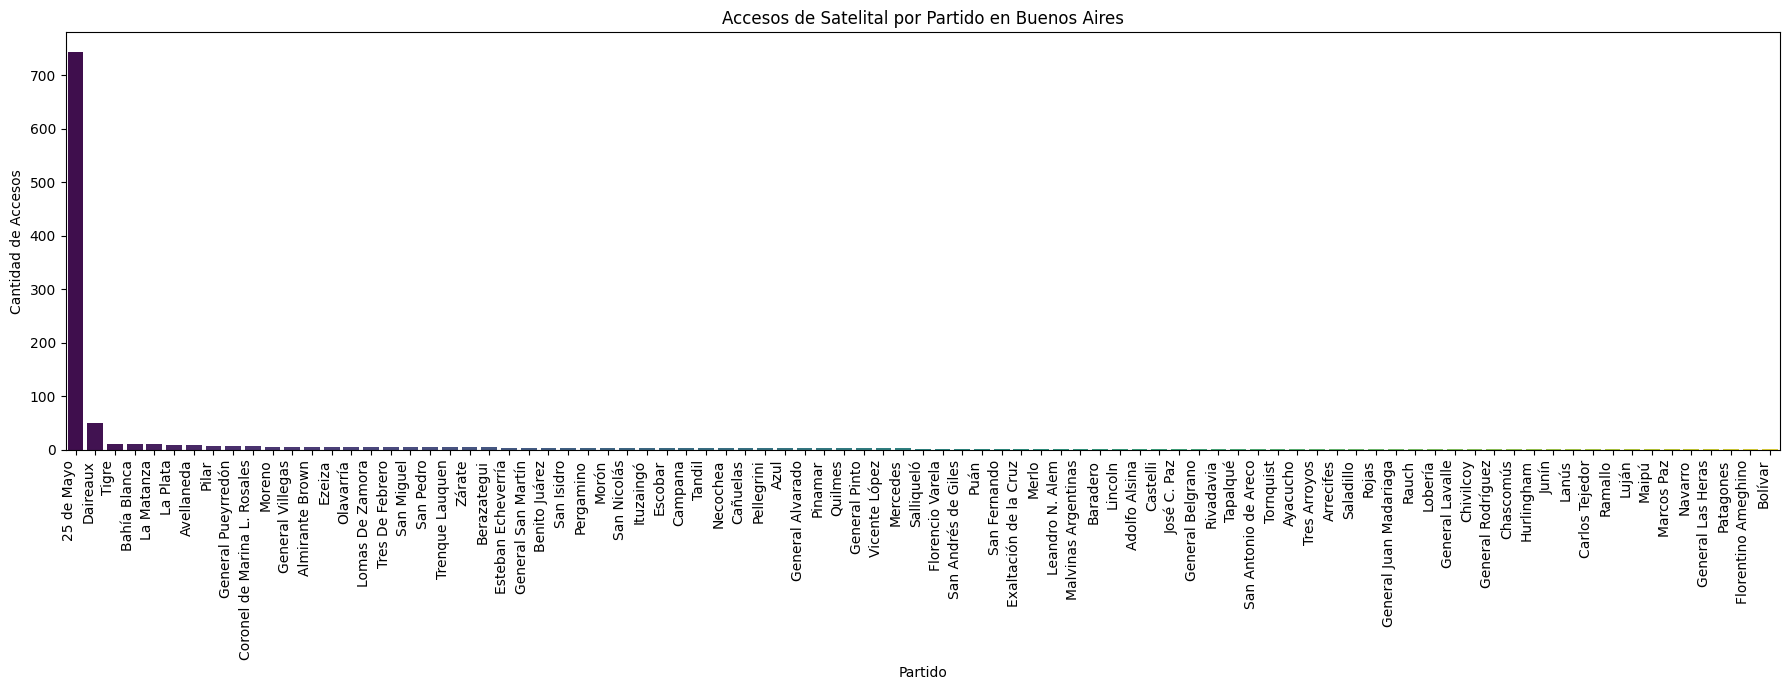

In [24]:
# Filtrar el DataFrame para la provincia de Buenos Aires y tecnología Satelital
df_satelital_bsas = dfs['acc_tec_localidad'][(dfs['acc_tec_localidad']['Provincia'] == 'BUENOS AIRES') & (dfs['acc_tec_localidad']['Tecnologia'] == 'SATELITAL')]

accesos_por_partido_satelital = df_satelital_bsas.groupby('Partido')['Accesos'].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 7))
sns.barplot(x=accesos_por_partido_satelital.index, y=accesos_por_partido_satelital.values, palette="viridis")
plt.title('Accesos de Satelital por Partido en Buenos Aires')
plt.xlabel('Partido')
plt.ylabel('Cantidad de Accesos')
plt.xticks(rotation=90, ha='right') 
plt.tight_layout() 
plt.show()

C:\Users\segen\AppData\Local\Temp\ipykernel_28448\995724433.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accesos_por_partido_wireless.index, y=accesos_por_partido_wireless.values, palette="viridis")


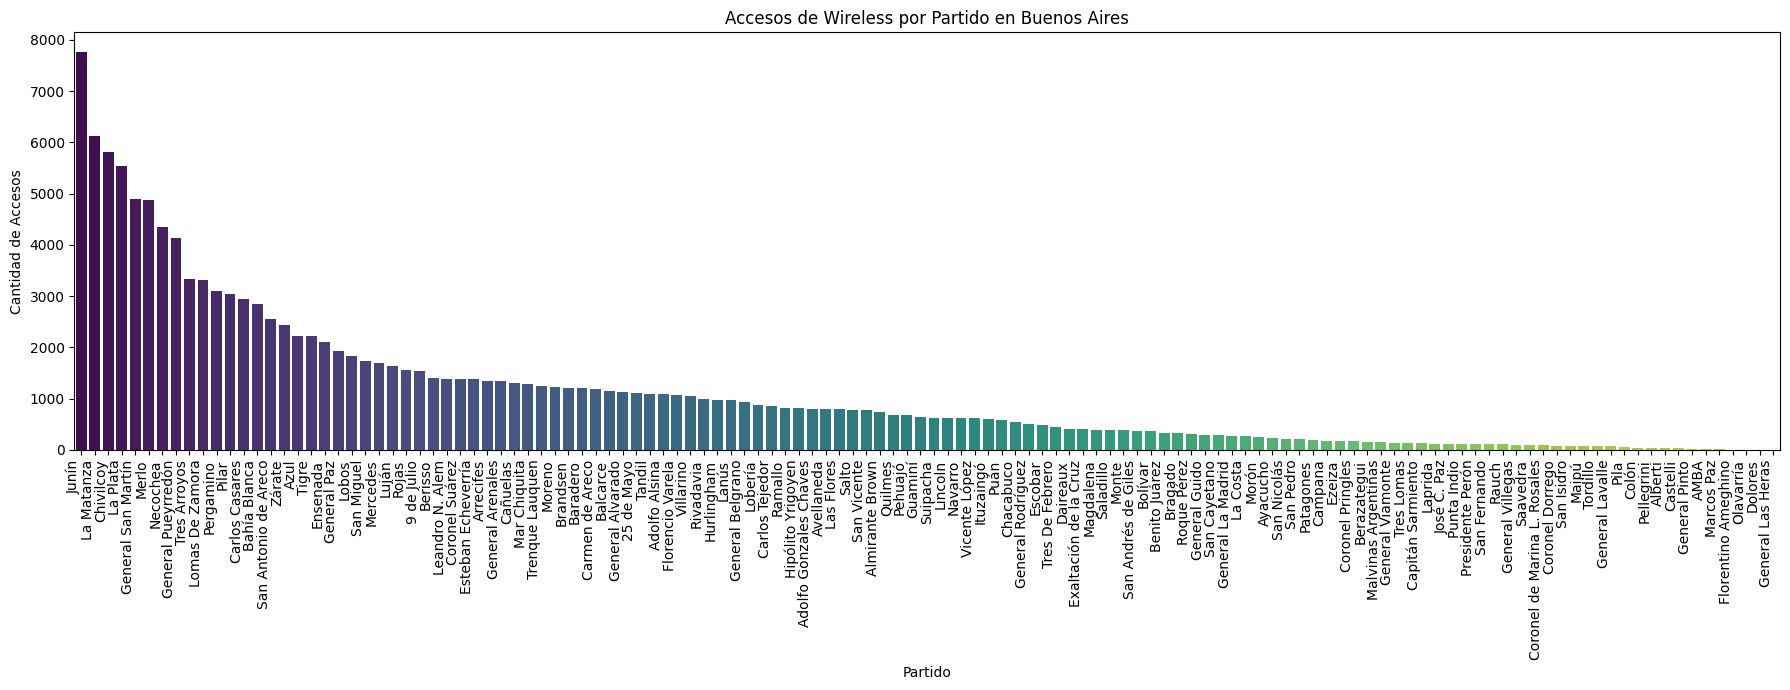

In [25]:
# Filtrar el DataFrame para la provincia de Buenos Aires y tecnología Wireless
df_wireless_bsas = dfs['acc_tec_localidad'][(dfs['acc_tec_localidad']['Provincia'] == 'BUENOS AIRES') & (dfs['acc_tec_localidad']['Tecnologia'] == 'WIRELESS')]

accesos_por_partido_wireless = df_wireless_bsas.groupby('Partido')['Accesos'].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 7))
sns.barplot(x=accesos_por_partido_wireless.index, y=accesos_por_partido_wireless.values, palette="viridis")
plt.title('Accesos de Wireless por Partido en Buenos Aires')
plt.xlabel('Partido')
plt.ylabel('Cantidad de Accesos')
plt.xticks(rotation=90, ha='right') 
plt.tight_layout()
plt.show()

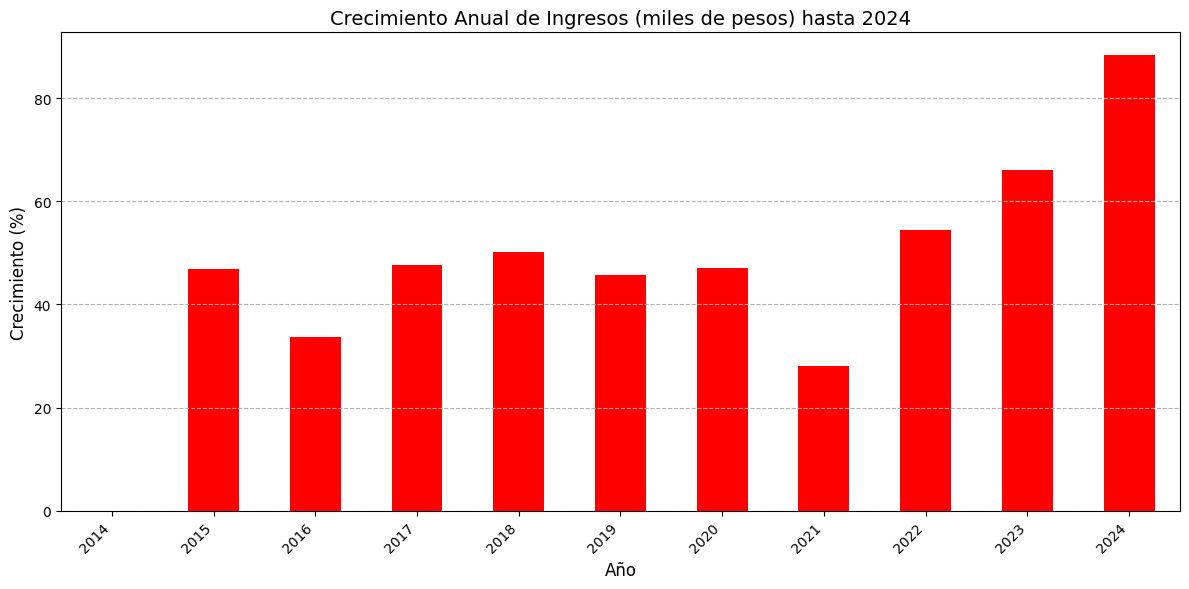

In [26]:
# Agrupar por año y sumar los 'Ingresos (miles de pesos)'
df_ingresos = dfs['ingresos']
ingresos_por_anio = df_ingresos.groupby('Año')['Ingresos (miles de pesos)'].sum()

# Calcular el cambio porcentual de un año a otro
crecimiento_ingresos = ingresos_por_anio.pct_change() * 100

# Filtrar los datos hasta el año 2024
crecimiento_hasta_2024 = crecimiento_ingresos[crecimiento_ingresos.index <= 2024]

plt.figure(figsize=(12, 6))
crecimiento_hasta_2024.plot(kind='bar', color='red')
plt.title('Crecimiento Anual de Ingresos (miles de pesos) hasta 2024', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Crecimiento (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

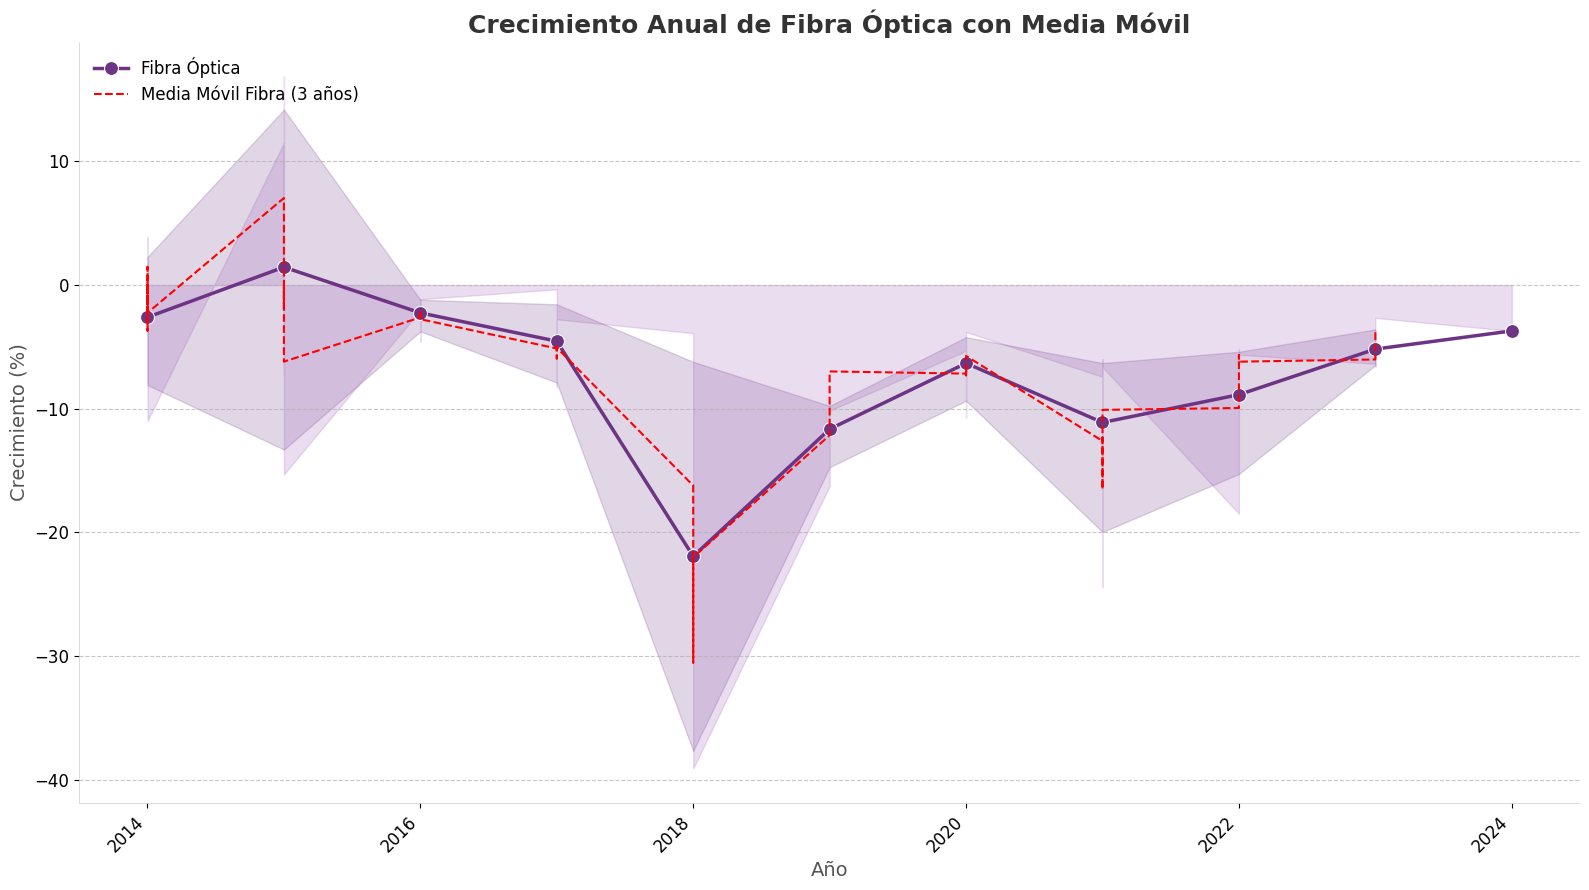

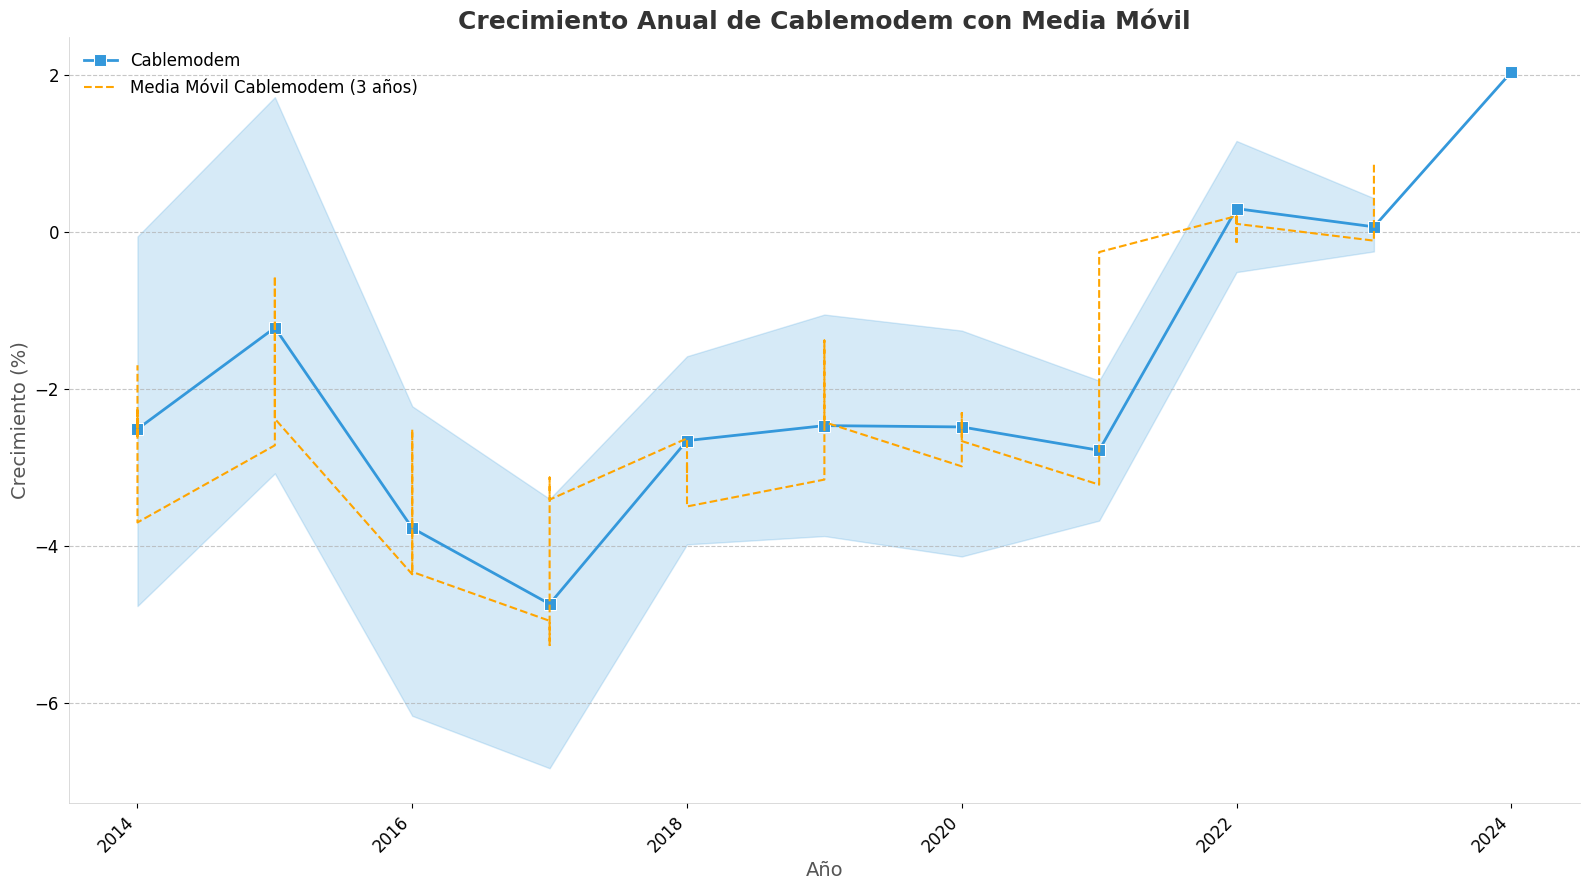

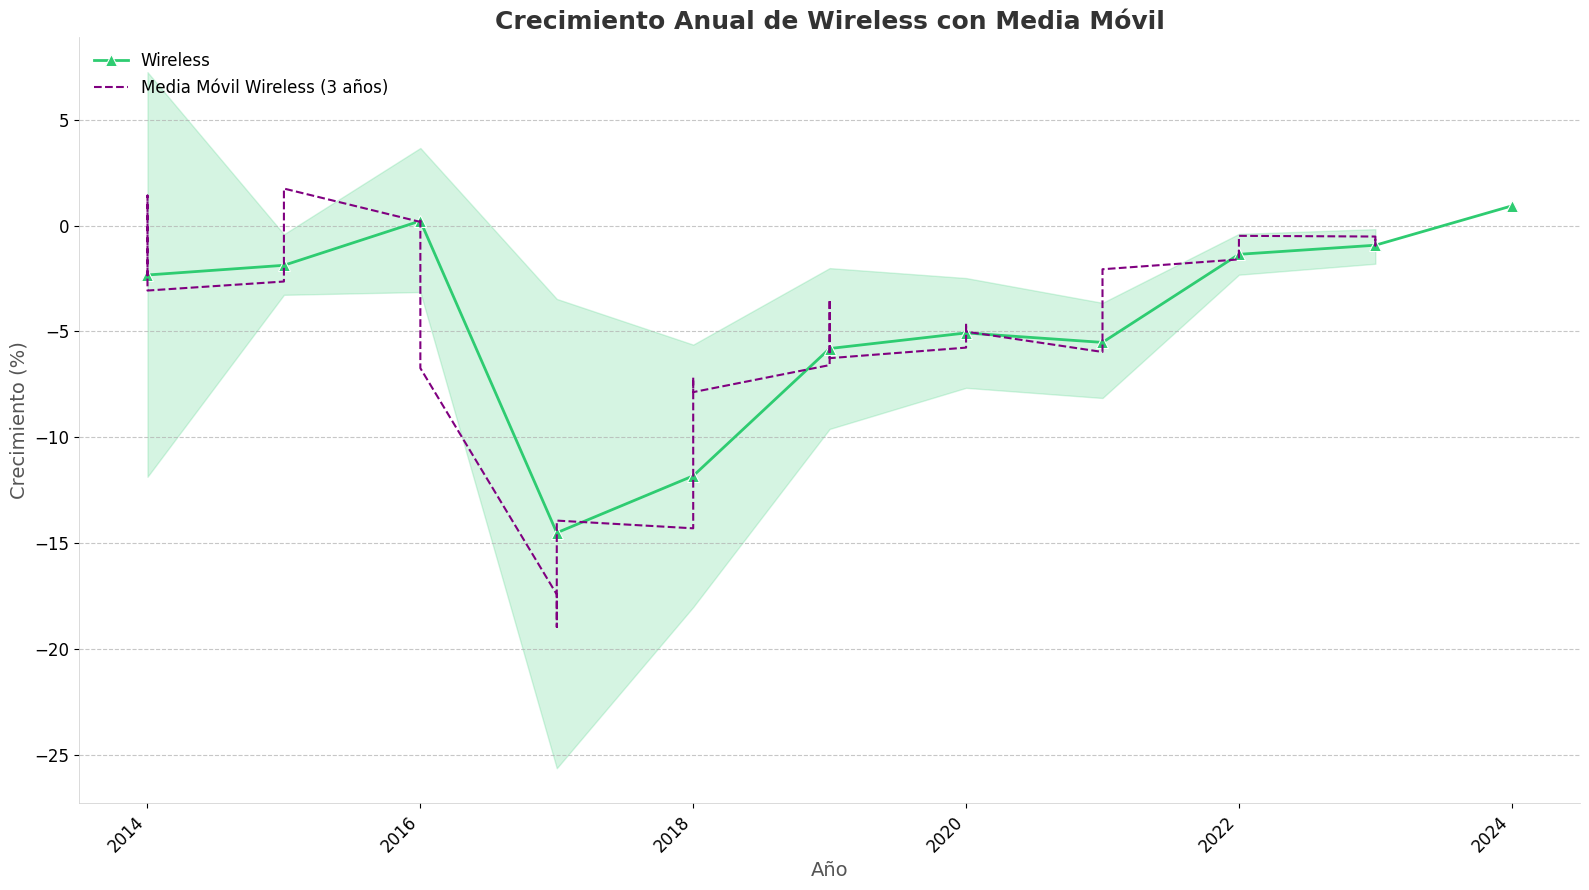

In [27]:
# KPI 1 - Fibra Óptica
df_tecnologias['Fibra Optica Growth'] = df_tecnologias['Fibra óptica'].pct_change() * 100

plt.figure(figsize=(16, 9))
sns.lineplot(x=df_tecnologias['Año'], y=df_tecnologias['Fibra Optica Growth'],
             marker='o', linestyle='-', color='#6c3483', linewidth=2.5, markersize=10, label='Fibra Óptica')
plt.fill_between(df_tecnologias['Año'], df_tecnologias['Fibra Optica Growth'], color='#9b59b6', alpha=0.2)
ma_fibra = df_tecnologias['Fibra Optica Growth'].rolling(window=3).mean()
plt.plot(df_tecnologias['Año'], ma_fibra, color='red', linestyle='--', label='Media Móvil Fibra (3 años)')

plt.title('Crecimiento Anual de Fibra Óptica con Media Móvil', fontsize=18, fontweight='bold', color='#333333')
plt.ylabel('Crecimiento (%)', fontsize=14, color='#555555')
plt.xlabel('Año', fontsize=14, color='#555555')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12, frameon=False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_color('#cccccc')
ax.spines['left'].set_color('#cccccc')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 9))
# KPI 1 - Cablemodem
cablemodem_growth = df_tecnologias['Cablemodem'].pct_change() * 100
sns.lineplot(x=df_tecnologias['Año'], y=cablemodem_growth, 
             marker='s', linestyle='-', color='#3498db', linewidth=2, markersize=8, label='Cablemodem')
ma_cablemodem = cablemodem_growth.rolling(window=3).mean()
plt.plot(df_tecnologias['Año'], ma_cablemodem, color='orange', linestyle='--', label='Media Móvil Cablemodem (3 años)')

plt.title('Crecimiento Anual de Cablemodem con Media Móvil', fontsize=18, fontweight='bold', color='#333333')
plt.ylabel('Crecimiento (%)', fontsize=14, color='#555555')
plt.xlabel('Año', fontsize=14, color='#555555')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12, frameon=False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_color('#cccccc')
ax.spines['left'].set_color('#cccccc')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 9))
# KPI 1 - Wireless
wireless_growth = df_tecnologias['Wireless'].pct_change() * 100
sns.lineplot(x=df_tecnologias['Año'], y=wireless_growth, 
             marker='^', linestyle='-', color='#2ecc71', linewidth=2, markersize=8, label='Wireless')
ma_wireless = wireless_growth.rolling(window=3).mean()
plt.plot(df_tecnologias['Año'], ma_wireless, color='purple', linestyle='--', label='Media Móvil Wireless (3 años)')

plt.title('Crecimiento Anual de Wireless con Media Móvil', fontsize=18, fontweight='bold', color='#333333')
plt.ylabel('Crecimiento (%)', fontsize=14, color='#555555')
plt.xlabel('Año', fontsize=14, color='#555555')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12, frameon=False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_color('#cccccc')
ax.spines['left'].set_color('#cccccc')

plt.tight_layout()
plt.show()

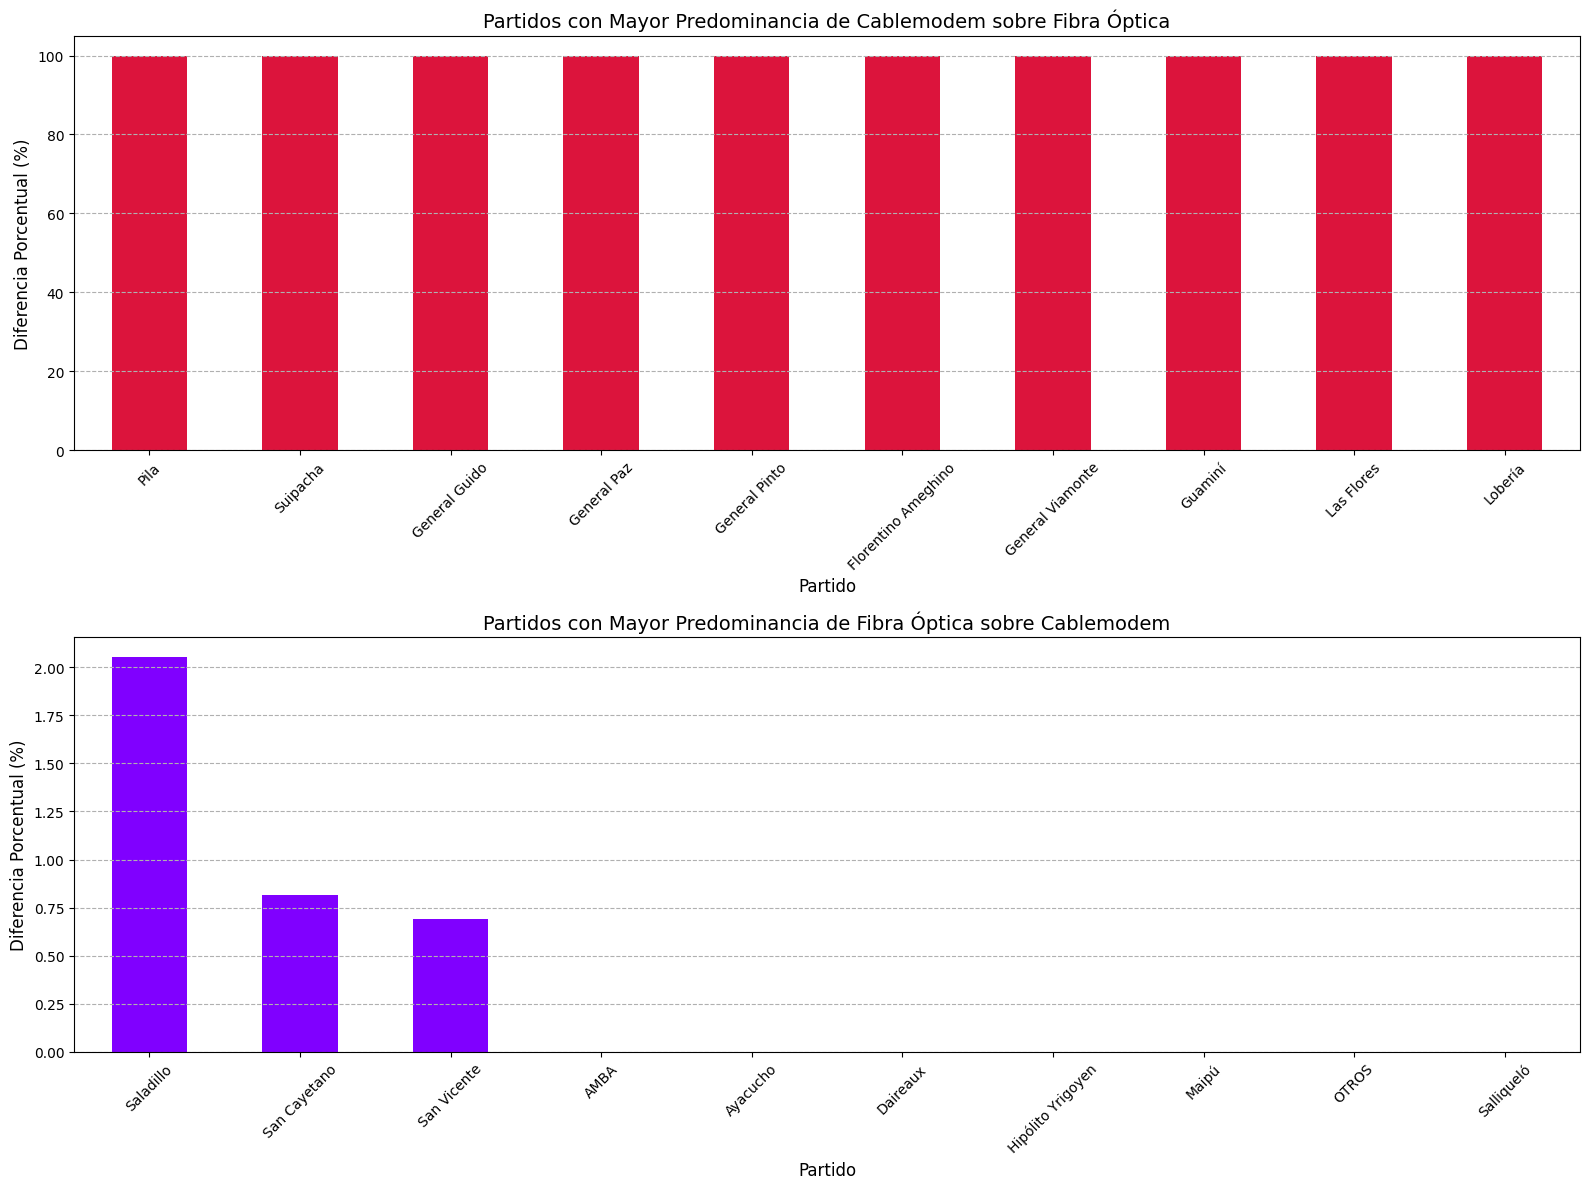


Tabla de Comparación entre Fibra Óptica y Cablemodem:
Tecnologia              FIBRA OPTICA  CABLEMODEM  Diferencia  \
Partido                                                        
25 de Mayo                     523.0      5382.0      4859.0   
9 de Julio                    6358.0      3463.0      2895.0   
AMBA                             0.0         0.0         0.0   
Adolfo Alsina                 3384.0         0.0      3384.0   
Adolfo Gonzales Chaves        1597.0         0.0      1597.0   
...                              ...         ...         ...   
Tres Lomas                     446.0       814.0       368.0   
Vicente López                56705.0     67019.0     10314.0   
Villa Gesell                  6899.0         0.0      6899.0   
Villarino                     2296.0      1133.0      1163.0   
Zárate                        1243.0     27242.0     25999.0   

Tecnologia              Porcentaje_Diferencia  
Partido                                        
25 de Mayo      

In [28]:
# KPI 2: Análisis de la Adopción de Tecnologías de Acceso a Internet por Partido en Buenos Aires, enfocado en la brecha entre Fibra Óptica y Cablemodem

# 1. Calculo la penetración combinada de Fibra Óptica y Cablemodem por partido
df_comparacion = dfs['acc_tec_localidad'][dfs['acc_tec_localidad']['Provincia'] == 'BUENOS AIRES'].groupby(['Partido', 'Tecnologia'])['Accesos'].sum().unstack(fill_value=0)
df_comparacion = df_comparacion[['FIBRA OPTICA', 'CABLEMODEM']]

# 2. Calculo la diferencia absoluta en la cantidad de accesos entre Fibra Óptica y Cablemodem por partido
df_comparacion['Diferencia'] = abs(df_comparacion['FIBRA OPTICA'] - df_comparacion['CABLEMODEM'])

# 3. Calculo el porcentaje de diferencia en la cantidad de accesos entre Fibra Óptica y Cablemodem por partido
df_comparacion['Porcentaje_Diferencia'] = (df_comparacion['Diferencia'] / (df_comparacion['FIBRA OPTICA'] + df_comparacion['CABLEMODEM'])) * 100

# 4. Identifico los partidos con mayor predominancia de Cablemodem sobre Fibra Óptica (mayor diferencia porcentual negativa)
top_cablemodem = df_comparacion.sort_values(by='Porcentaje_Diferencia', ascending=False).head(10)

# 5. Identifico los partidos con mayor predominancia de Fibra Óptica sobre Cablemodem (mayor diferencia porcentual positiva)
top_fibra = df_comparacion.sort_values(by='Porcentaje_Diferencia', ascending=False).tail(10)

# Visualización
fig, axes = plt.subplots(2, 1, figsize=(16, 12))
color_cablemodem = '#DC143C'  # Un rojo oscuro
color_fibra = '#8000FF'  # Un violeta oscuro

# Gráfico de barras para los partidos con mayor predominancia de Cablemodem
top_cablemodem['Porcentaje_Diferencia'].plot(kind='bar', ax=axes[0], color=color_cablemodem)
axes[0].set_title('Partidos con Mayor Predominancia de Cablemodem sobre Fibra Óptica', fontsize=14)
axes[0].set_ylabel('Diferencia Porcentual (%)', fontsize=12)
axes[0].set_xlabel('Partido', fontsize=12)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].grid(axis='y', linestyle='--')

# Gráfico de barras para los partidos con mayor predominancia de Fibra Óptica
top_fibra['Porcentaje_Diferencia'].plot(kind='bar', ax=axes[1], color=color_fibra)
axes[1].set_title('Partidos con Mayor Predominancia de Fibra Óptica sobre Cablemodem', fontsize=14)
axes[1].set_ylabel('Diferencia Porcentual (%)', fontsize=12)
axes[1].set_xlabel('Partido', fontsize=12)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

print("\nTabla de Comparación entre Fibra Óptica y Cablemodem:")
print(df_comparacion)

C:\Users\segen\AppData\Local\Temp\ipykernel_28448\3988900459.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wireless_growth_norte.index, y=wireless_growth_norte.values, palette="viridis")


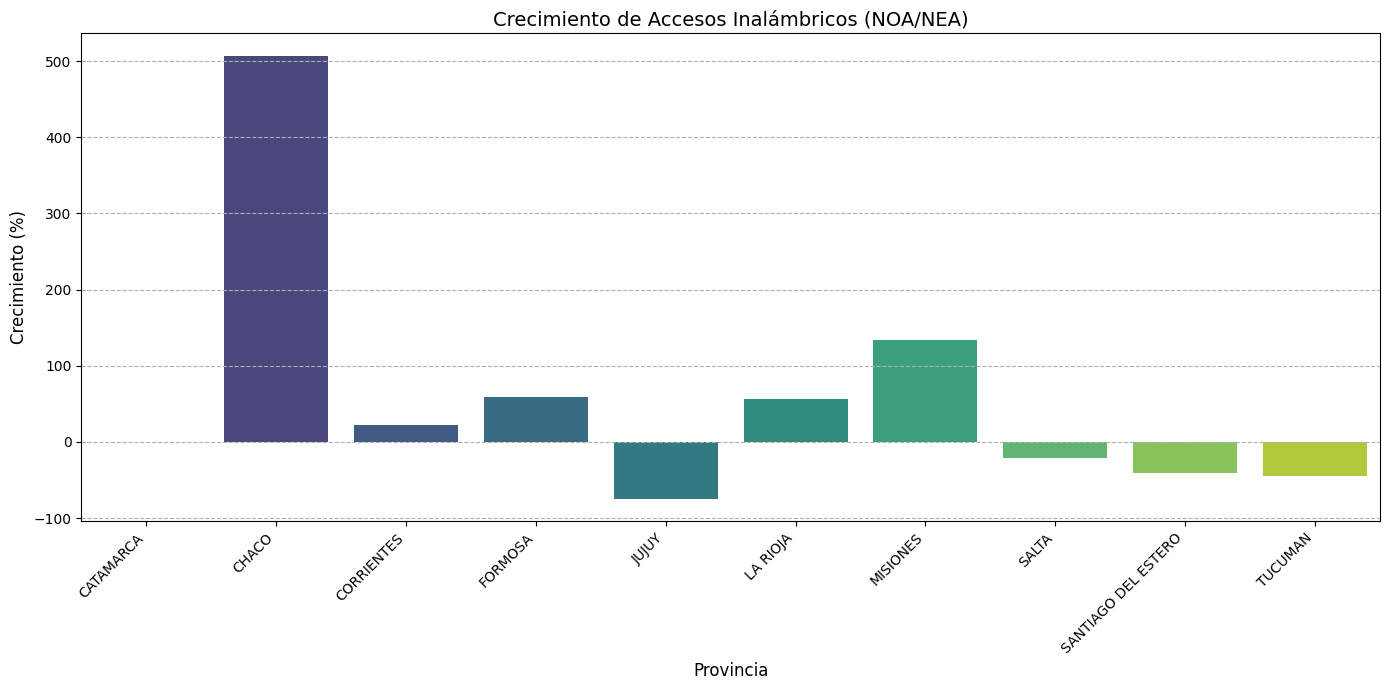

In [29]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# KPI 3: Crecimiento de Accesos Inalámbricos en Provincias del Norte
# Filtrar el DataFrame para las provincias del NOA y NEA
provincias_norte = ['JUJUY', 'SALTA', 'TUCUMAN', 'CATAMARCA', 'LA RIOJA', 'SANTIAGO DEL ESTERO', 'FORMOSA', 'CHACO', 'CORRIENTES', 'MISIONES']
df_wireless_norte = dfs['acc_tec_localidad'][dfs['acc_tec_localidad']['Provincia'].isin(provincias_norte) & (dfs['acc_tec_localidad']['Tecnologia'] == 'WIRELESS')]

# Calcular el total de accesos inalámbricos por provincia
wireless_accesos_norte = df_wireless_norte.groupby('Provincia')['Accesos'].sum()

# Calcular el crecimiento porcentual interanual
wireless_growth_norte = wireless_accesos_norte.pct_change() * 100

# Crear el gráfico de barras 2D
plt.figure(figsize=(14, 7))
sns.barplot(x=wireless_growth_norte.index, y=wireless_growth_norte.values, palette="viridis")
plt.title('Crecimiento de Accesos Inalámbricos (NOA/NEA)', fontsize=14)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Crecimiento (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


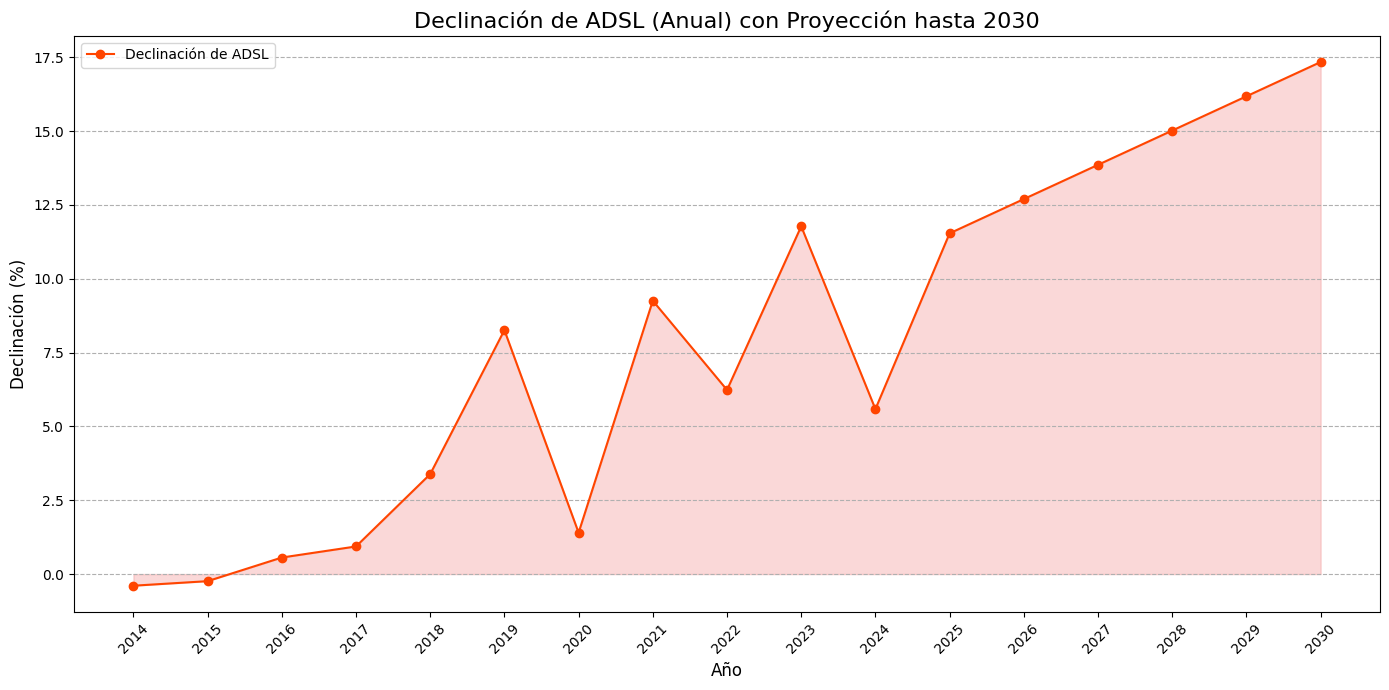

In [30]:
from sklearn.linear_model import LinearRegression
import numpy as np

# KPI 4: Declinación de ADSL - Proyección hasta 2030

# Calculate ADSL Decline
df_tecnologias['ADSL Decline'] = df_tecnologias['ADSL'].pct_change() * 100

# Años como variable independiente
years = df_tecnologias['Año'].values.reshape(-1, 1)
# Tasa de declinación de ADSL como variable dependiente
adsl_decline = df_tecnologias['ADSL Decline'].dropna().values

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(years[~np.isnan(df_tecnologias['ADSL Decline'])], adsl_decline)

# 2. Proyectar la declinación hasta 2030
years_2030 = np.arange(2025, 2031).reshape(-1, 1)
adsl_decline_2030 = model.predict(years_2030)

# 3. Crear un DataFrame para los años proyectados
df_proyeccion = pd.DataFrame({
    'Año': years_2030.flatten(),
    'ADSL Decline': adsl_decline_2030
})

# 4. Concatenar los datos históricos con la proyección
df_completo = pd.concat([df_tecnologias[['Año', 'ADSL Decline']], df_proyeccion], ignore_index=True)
df_completo = df_completo.groupby('Año')['ADSL Decline'].mean().reset_index()

# Visualización con un gráfico de línea y áreas sombreadas
plt.figure(figsize=(14, 7))
plt.plot(df_completo['Año'], df_completo['ADSL Decline'], marker='o', linestyle='-', color='#FF4500', label='Declinación de ADSL')
plt.fill_between(df_completo['Año'], df_completo['ADSL Decline'], color='lightcoral', alpha=0.3)
plt.title('Declinación de ADSL (Anual) con Proyección hasta 2030', fontsize=16)
plt.ylabel('Declinación (%)', fontsize=12)
plt.xlabel('Año', fontsize=12)
plt.xticks(df_completo['Año'], rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()